In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import requests
import io

In [33]:
# URL of the datasets directory
base_url = "https://vincentarelbundock.github.io/Rdatasets/datasets.html"

In [ ]:
# Define datasets and their column names for x and y axes
datasets_info = {
    "a10_ts": {"x": "time", "y": "value", "description": "Monthly Anti-Diabetic Drug Subsidy in Australia from 1991 to 2008."},
    "airpass_ts": {"x": "time", "y": "value", "description": "Monthly Airline Passenger Numbers from 1949 to 1960."},
    "ausbeer_ts": {"x": "time", "y": "value", "description": "Quarterly Australian Beer Production."},
    "auscafe_ts": {"x": "time", "y": "value", "description": "Monthly Expenditure on Eating Out in Australia."},
    "BJsales_ts": {"x": "time", "y": "value", "description": "Sales Data with Leading Indicator."},
    "bricksq_ts": {"x": "time", "y": "value", "description": "Quarterly Clay Brick Production."},
    "co2_ts": {"x": "time", "y": "value", "description": "Mauna Loa Atmospheric CO2 Concentration."},
    "discoveries_ts": {"x": "time", "y": "value", "description": "Yearly Numbers of Important Discoveries."},
    "economics_df_ts": {"x": "rownames", "y": "unemploy", "description": "US Economic Time Series."},
    "elec_ts": {"x": "time", "y": "value", "description": "Electricity Production."},
    "elecdaily_mts": {"x": "rownames", "y": "Demand", "description": "Half-Hourly and Daily Electricity Demand for Victoria, Australia, in 2014."},
    "elecequip_ts": {"x": "time", "y": "value", "description": "Electrical Equipment Manufactured in the Euro Area."},
    "euretail_ts": {"x": "time", "y": "value", "description": "Quarterly Retail Trade in the Euro Area."},
    "goog200_ts": {"x": "time", "y": "value", "description": "Daily Closing Stock Prices of Google Inc. (200 Days)."},
    "gtemp_both_ts": {"x": "time", "y": "value", "description": "Global Mean Land and Open Ocean Temperature Deviations (1850-2023)."},
    "h02_ts": {"x": "time", "y": "value", "description": "Monthly Corticosteroid Drug Subsidy in Australia (1991-2008)."},
    "hsales2_ts": {"x": "time", "y": "value", "description": "Sales of New One-Family Houses (1987-1996)."},
    "hyndsight_ts": {"x": "time", "y": "value", "description": "Daily Pageviews for the Hyndsight Blog (April 2014 - April 2015)."},
}

Processing dataset 1/18: a10_ts
Saved to datasets/1_a10_ts.csv


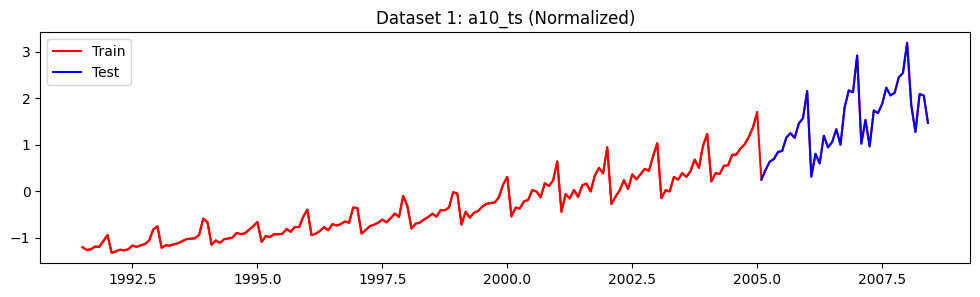

Processing dataset 2/18: airpass_ts
Saved to datasets/2_airpass_ts.csv


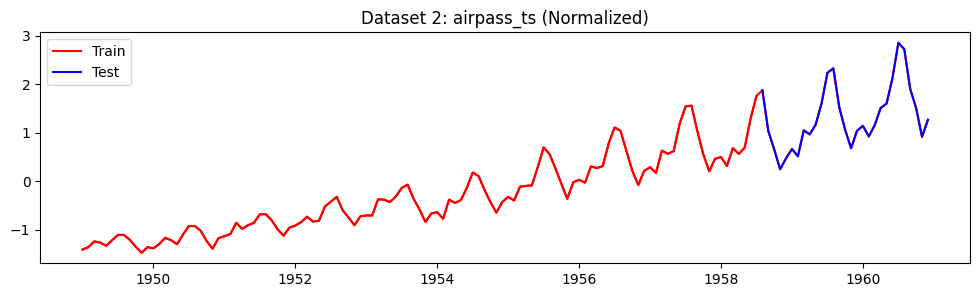

Processing dataset 3/18: ausbeer_ts
Saved to datasets/3_ausbeer_ts.csv


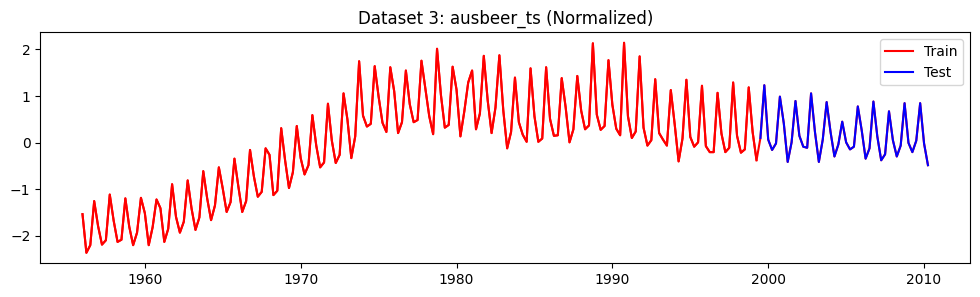

Processing dataset 4/18: auscafe_ts
Saved to datasets/4_auscafe_ts.csv


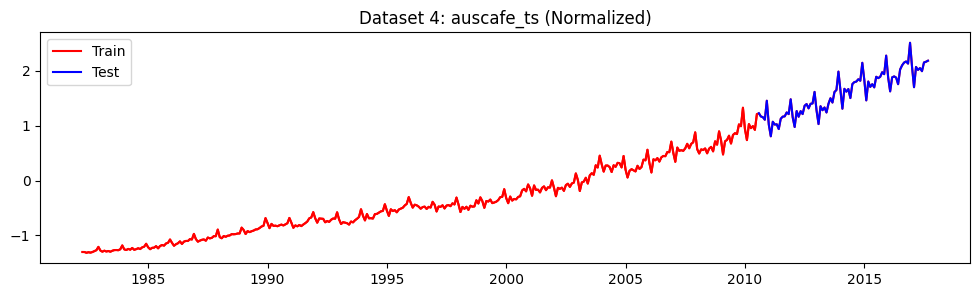

Processing dataset 5/18: BJsales_ts
Saved to datasets/5_BJsales_ts.csv


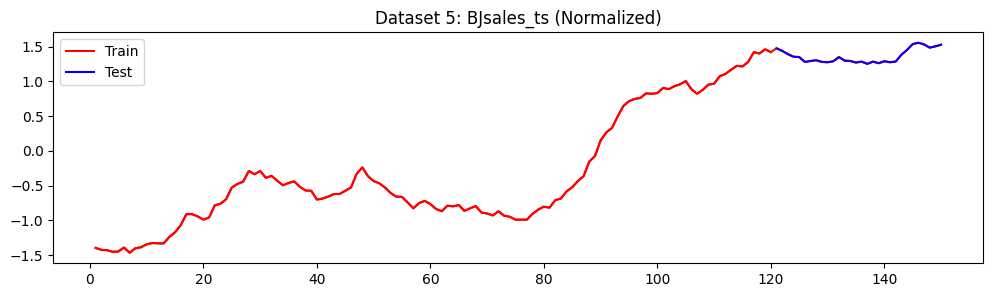

Processing dataset 6/18: bricksq_ts
Saved to datasets/6_bricksq_ts.csv


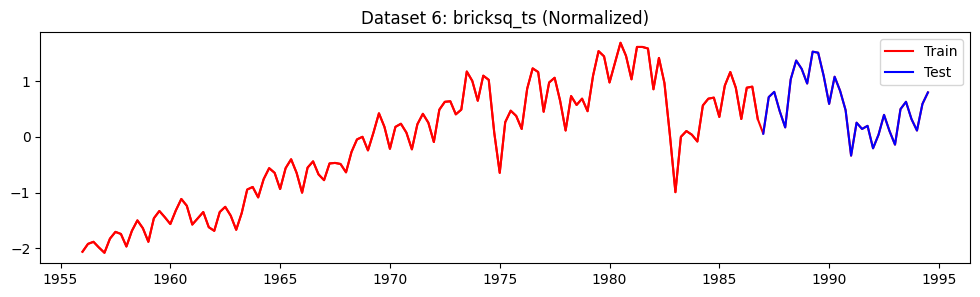

Processing dataset 7/18: co2_ts
Saved to datasets/7_co2_ts.csv


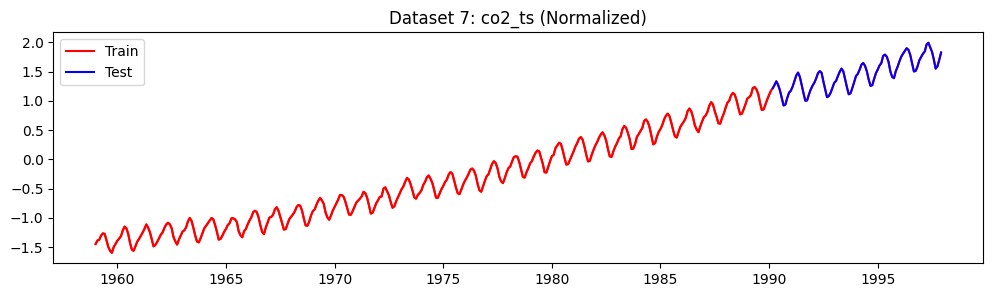

Processing dataset 8/18: discoveries_ts
Saved to datasets/8_discoveries_ts.csv


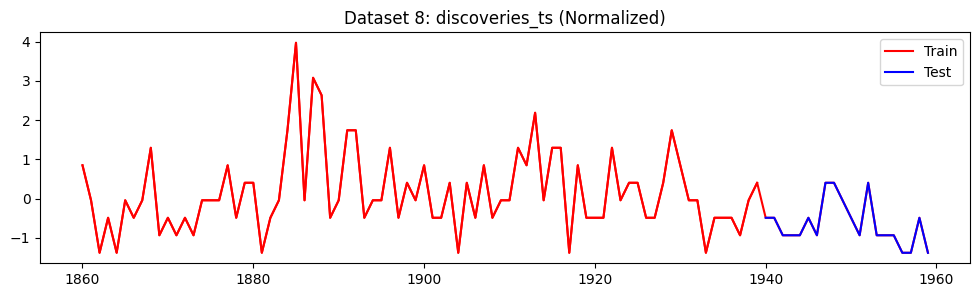

Processing dataset 9/18: economics_df_ts
Saved to datasets/9_economics_df_ts.csv


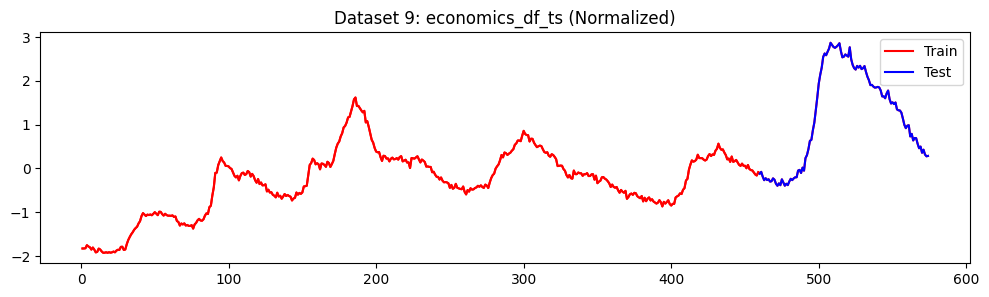

Processing dataset 10/18: elec_ts
Saved to datasets/10_elec_ts.csv


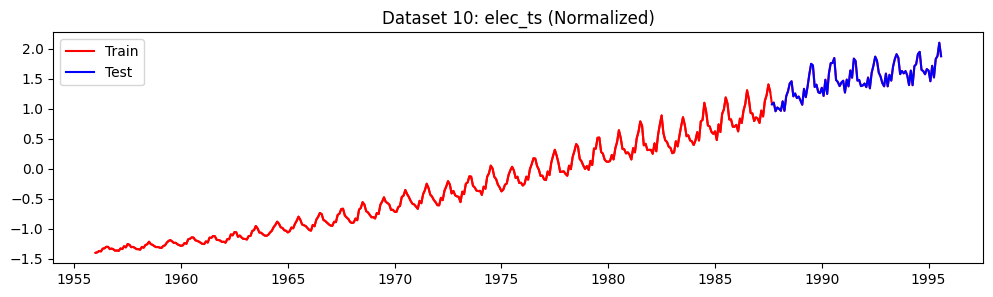

Processing dataset 11/18: elecdaily_mts
Saved to datasets/11_elecdaily_mts.csv


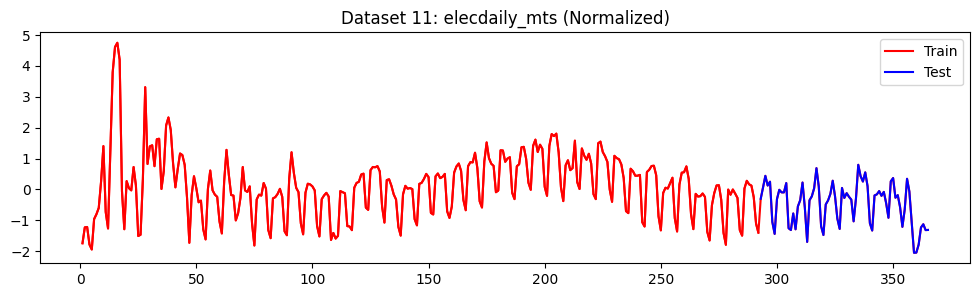

Processing dataset 12/18: elecequip_ts
Saved to datasets/12_elecequip_ts.csv


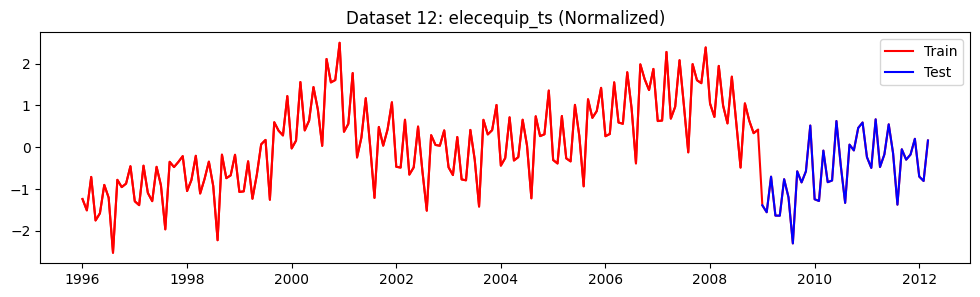

Processing dataset 13/18: euretail_ts
Saved to datasets/13_euretail_ts.csv


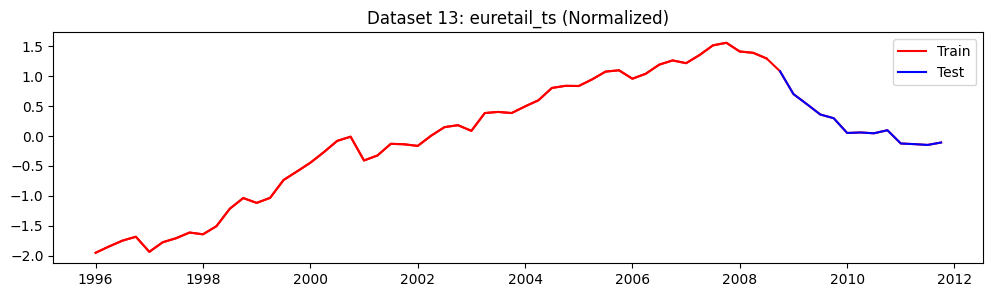

Processing dataset 14/18: goog200_ts
Saved to datasets/14_goog200_ts.csv


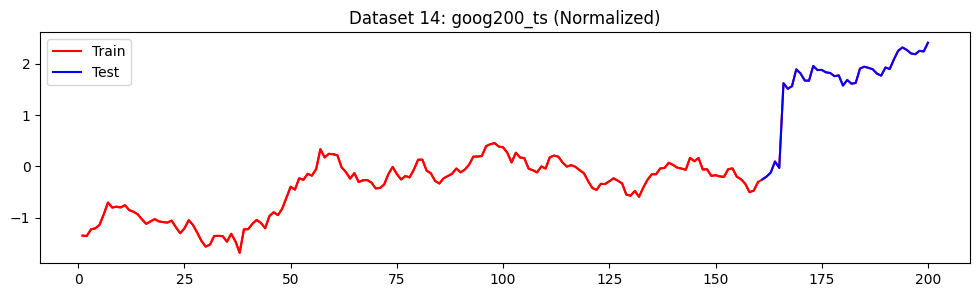

Processing dataset 15/18: gtemp_both_ts
Saved to datasets/15_gtemp_both_ts.csv


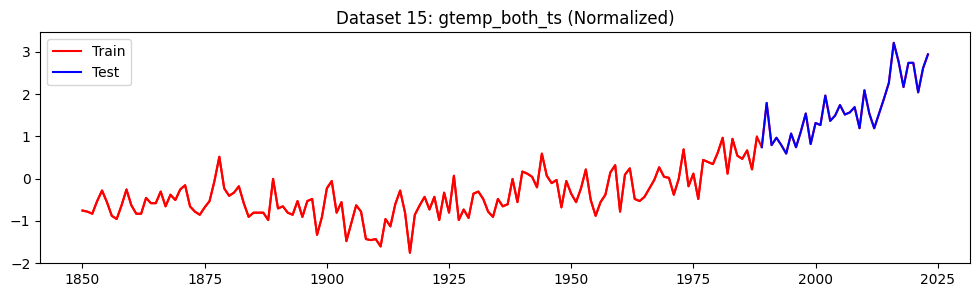

Processing dataset 16/18: h02_ts
Saved to datasets/16_h02_ts.csv


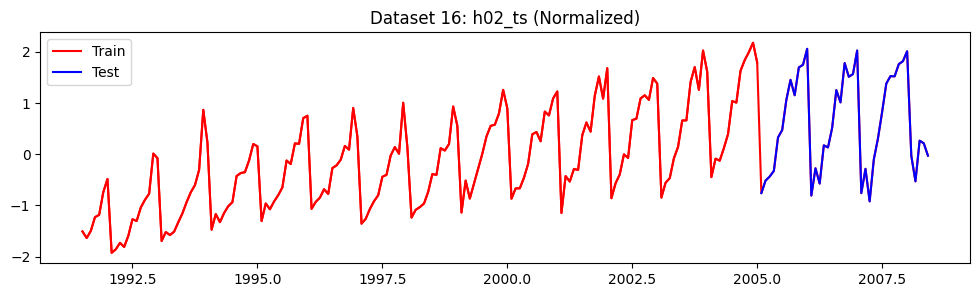

Processing dataset 17/18: hsales2_ts
Saved to datasets/17_hsales2_ts.csv


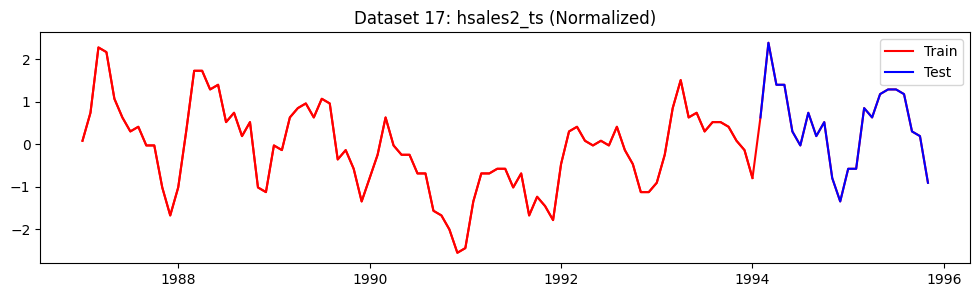

Processing dataset 18/18: hyndsight_ts
Saved to datasets/18_hyndsight_ts.csv


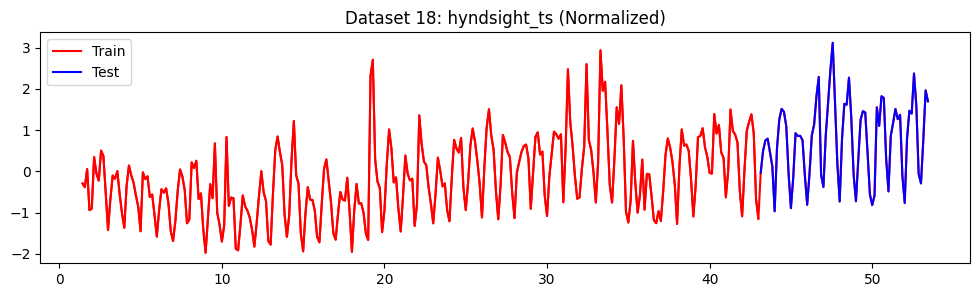

All datasets processed!


In [ ]:
# Download and normalize datasets
os.makedirs("datasets", exist_ok=True)

for num, (dataset, info) in enumerate(datasets_info.items(), 1):
    try:
        print(f"Processing dataset {num}/{len(datasets_info)}: {dataset}")
        url = f"https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/timeSeriesDataSets/{dataset}.csv"
        response = requests.get(url)
        
        if response.status_code == 200:
            data = io.StringIO(response.text)
            df = pd.read_csv(data)
            
            x_col = info["x"]
            y_col = info["y"]
            
            new_df = pd.DataFrame()
            
            if x_col is not None:
                new_df["x"] = df[x_col]
            else:
                new_df["x"] = df.index
            
            if y_col is not None:
                new_df["y"] = df[y_col]
            else:
                print(f"Error: {dataset} does not specify y column")
                continue
            
            mean_y = np.mean(new_df["y"])
            std_y = np.std(new_df["y"])
            new_df["y"] = (new_df["y"] - mean_y) / std_y
            
            output_path = f"datasets/{num}_{dataset}.csv"
            new_df.to_csv(output_path, index=False)
            print(f"Saved to {output_path}")
            
            plt.figure(figsize=(12, 3))
            split_index = int(len(new_df) * 0.8)
            
            plt.plot(new_df["x"], new_df["y"], color='red')
            plt.plot(new_df["x"][:split_index], new_df["y"][:split_index], color='red', label='Train')
            plt.plot(new_df["x"][split_index:], new_df["y"][split_index:], color='blue', label='Test')
            
            plt.title(f"Dataset {num}: {dataset} (Normalized)")
            plt.legend()
            
            plt.show()
        else:
            print(f"Failed to download {dataset}, status code: {response.status_code}")
    except Exception as e:
        print(f"Error processing {dataset}: {e}")

print("All datasets processed!")